In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('all_stocks_5yr.csv') 

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [8]:
df.shape

(619040, 7)

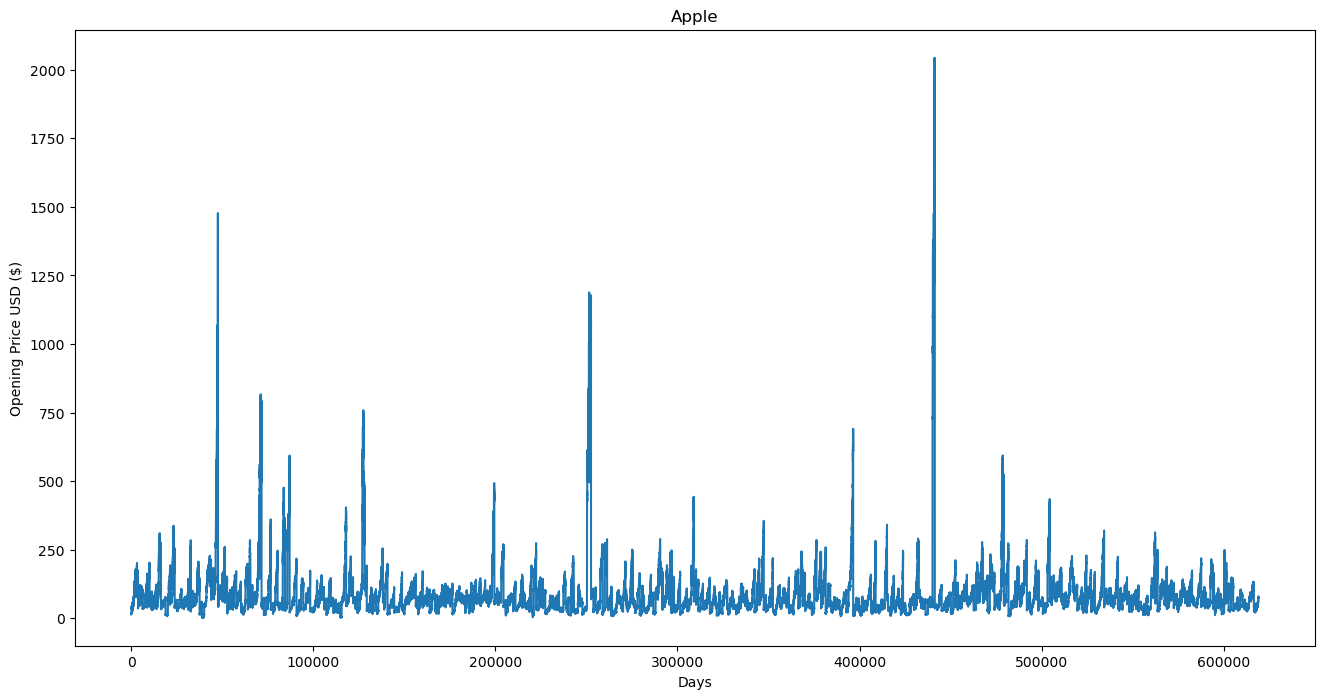

In [9]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

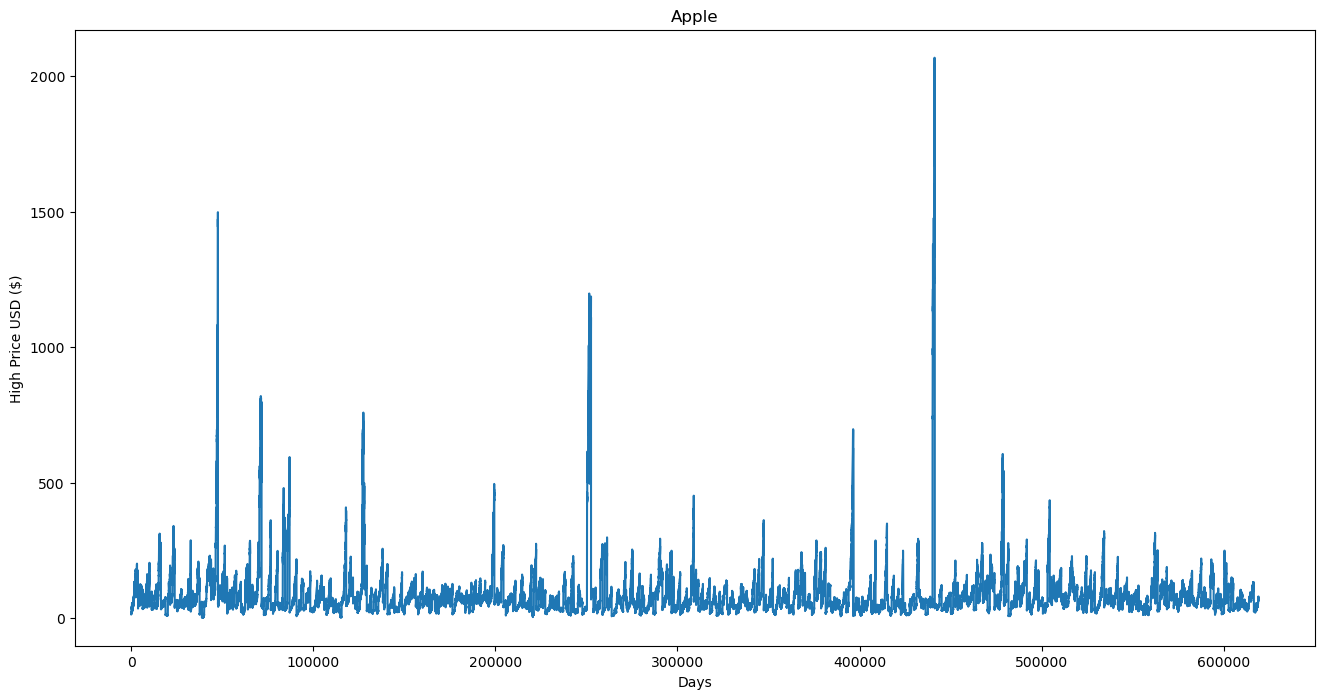

In [10]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

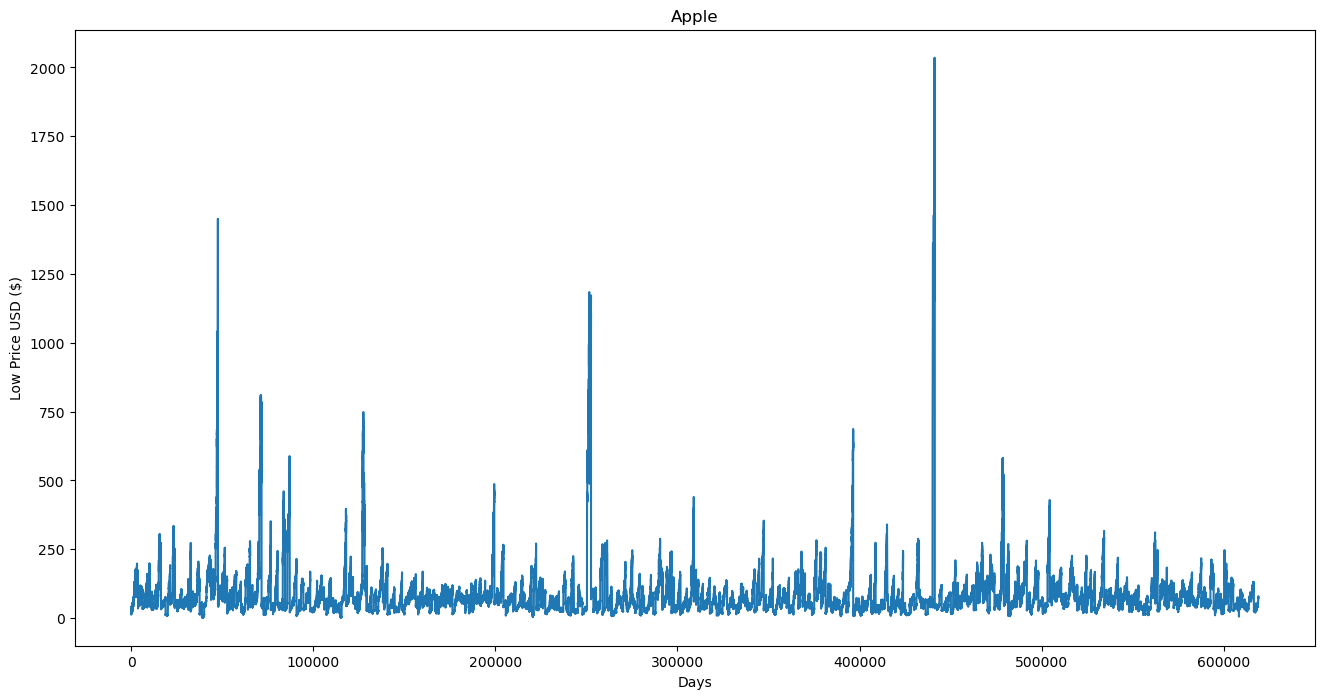

In [11]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

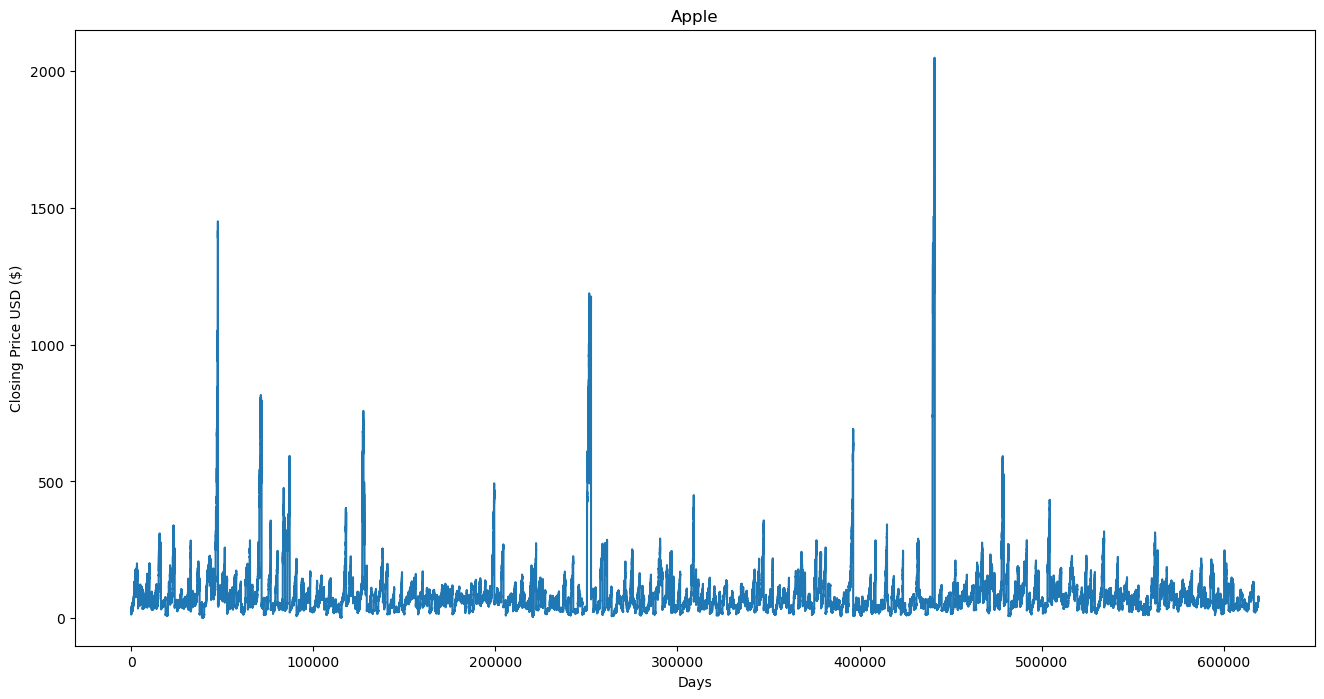

In [12]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [13]:
df2 = df['close']

In [14]:
df2.tail()

619035    77.82
619036    76.78
619037    73.83
619038    73.27
619039    73.86
Name: close, dtype: float64

In [15]:
df2 = pd.DataFrame(df2)   

In [16]:
df2.tail()

,close
619035,77.82
619036,76.78
619037,73.83
619038,73.27
619039,73.86


In [17]:
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [18]:
df2.tail()

,close,Prediction
619035,77.82,NaN
619036,76.78,NaN
619037,73.83,NaN
619038,73.27,NaN
619039,73.86,NaN


In [34]:
X = df2.drop('Prediction', axis=1).iloc[:-future_days].copy()
print(X)

        close
0       14.75
1       14.46
2       14.27
3       14.66
4       13.99
...       ...
618935  64.70
618936  65.28
618937  65.40
618938  65.28
618939  65.25

[618940 rows x 1 columns]


In [23]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[16.75 16.84 16.94 ... 73.83 73.27 73.86]


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [36]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [38]:
x_future = df2.drop('Prediction', axis=1).iloc[:-future_days].copy()
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[55.12],
       [55.57],
       [56.46],
       [56.11],
       [56.28],
       [56.47],
       [55.59],
       [58.87],
       [59.47],
       [58.81],
       [59.43],
       [59.9 ],
       [59.72],
       [59.88],
       [60.  ],
       [60.33],
       [59.73],
       [59.91],
       [60.31],
       [60.31],
       [61.43],
       [62.3 ],
       [62.58],
       [62.61],
       [62.26],
       [62.28],
       [62.64],
       [62.5 ],
       [62.67],
       [62.98],
       [63.26],
       [62.58],
       [62.59],
       [61.85],
       [61.96],
       [62.23],
       [62.39],
       [62.55],
       [63.03],
       [63.  ],
       [63.  ],
       [63.51],
       [62.78],
       [62.72],
       [62.76],
       [62.95],
       [62.5 ],
       [62.38],
       [62.67],
       [62.55],
       [61.79],
       [62.59],
       [62.47],
       [62.21],
       [62.56],
       [63.05],
       [63.35],
       [63.07],
       [62.46],
       [62.42],
       [62.75],
       [63.16],
       [

In [39]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[59.65341842 62.21446809 57.35367347 58.26090909 58.12557377 59.98046154
 57.30170213 60.87655556 63.76425    63.12385417 57.7905102  63.29989796
 62.57032609 63.48007692 60.2825     64.78708333 61.11510638 62.97935484
 62.20807692 62.20807692 68.67177083 68.40981818 67.77524194 66.25
 67.68617021 69.57633333 64.60607143 65.00443038 63.06027778 68.492
 66.30232558 67.77524194 62.66918367 66.85490909 68.0946     64.22848837
 65.8605814  64.01627273 64.38272727 66.3322561  66.3322561  65.98921053
 67.15215686 68.82697917 63.52115385 63.6056383  65.00443038 67.64118182
 63.06027778 64.01627273 64.55527273 62.66918367 69.04369565 67.65644444
 63.4359     69.02686275 66.91036066 70.51647059 67.15265306 64.37240741
 66.95770492 63.4575     68.54836735 63.788866   61.97820513 63.52474576
 67.65644444 67.75865385 71.2328     67.44660377 69.57633333 71.2328
 68.78692308 60.2825     62.07170732 64.70571429 61.11510638 63.29269231
 66.43294118 67.10903846 64.08683673 70.4373     64.26       63.72

C:\Users\KIIT\Downloads\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [40]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[58.14140423 58.54271778 59.3364268  59.02429404 59.17590138 59.34534488
 58.56055394 61.48568381 62.02076854 61.43217534 61.98509623 62.40424593
 62.24372051 62.38640978 62.49342672 62.78772333 62.25263859 62.41316401
 62.76988717 62.76988717 63.768712   64.54458486 64.79429107 64.82104531
 64.50891255 64.52674871 64.84779955 64.72294644 64.87455378 65.15101423
 65.40072044 64.79429107 64.80320915 64.14327131 64.24137018 64.48215831
 64.62484757 64.76753684 65.19560462 65.16885039 65.16885039 65.62367241
 64.97265265 64.91914418 64.95481649 65.12425999 64.72294644 64.6159295
 64.87455378 64.76753684 64.08976284 64.80320915 64.69619221 64.46432215
 64.77645492 65.21344078 65.48098315 65.23127694 64.68727413 64.65160181
 64.94589841 65.31153965 65.42747467 63.63494082 64.33055097 64.28596058
 64.46432215 64.7407826  64.38405944 63.86681087 64.52674871 64.38405944
 64.12543516 62.49342672 63.21579111 62.26155667 62.25263859 63.15336456
 63.41198885 63.83113855 63.29605382 63.16228264 63.

C:\Users\KIIT\Downloads\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4296\4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


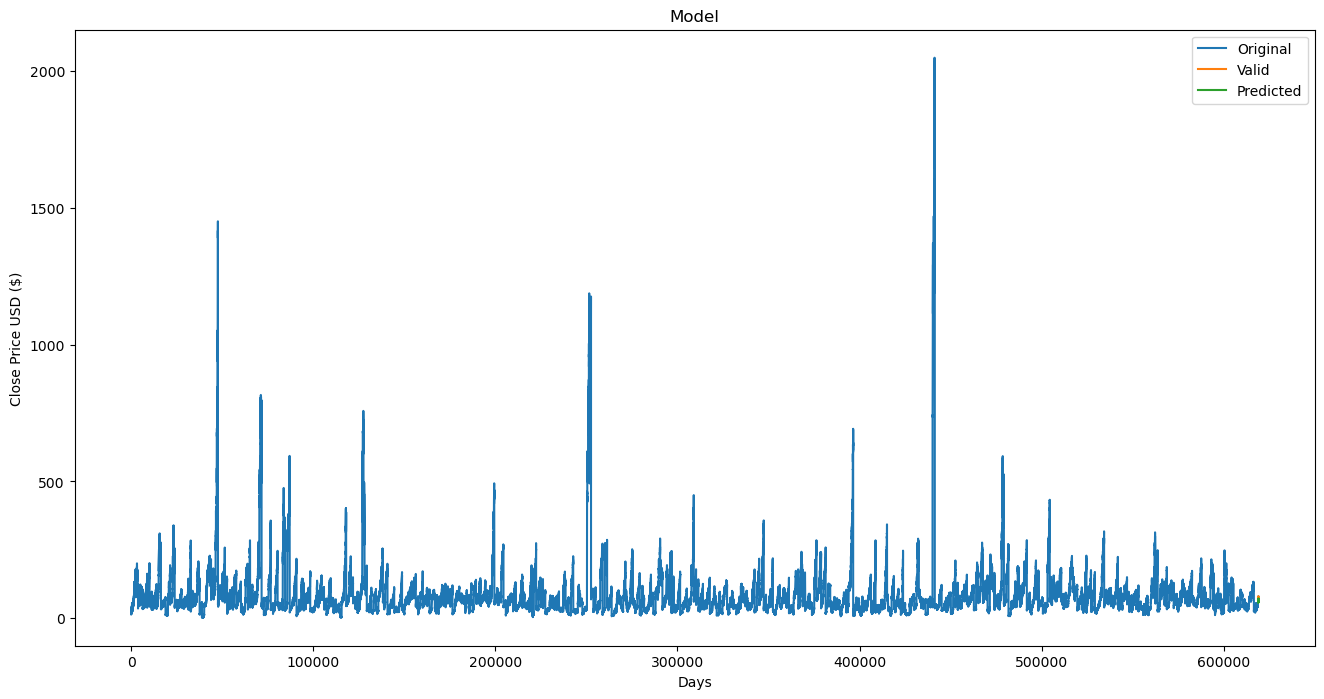

In [45]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()